## 1. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

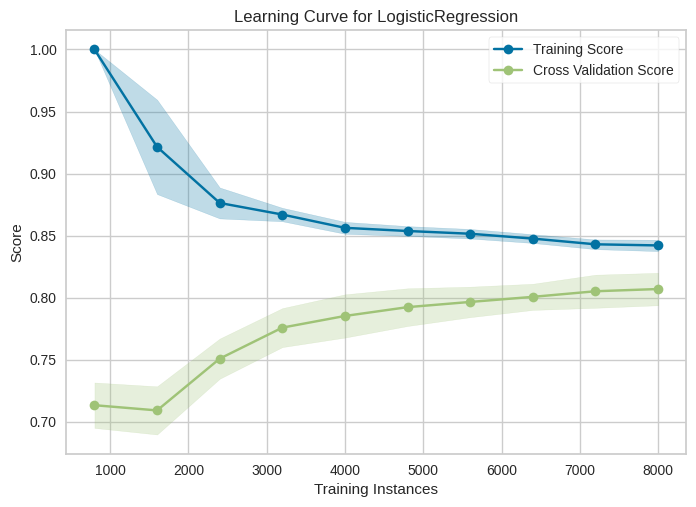

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y)
visualizer.show()

In [ ]:
#Если мы предполагаем, что наша исходная модель переобучалась, то давайте построим и оценим
# модель с большим значением параметра регуляризации:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1_000_000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


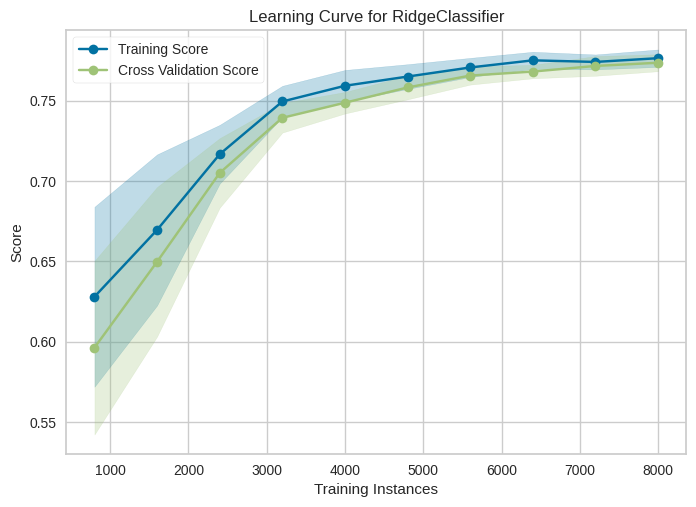

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

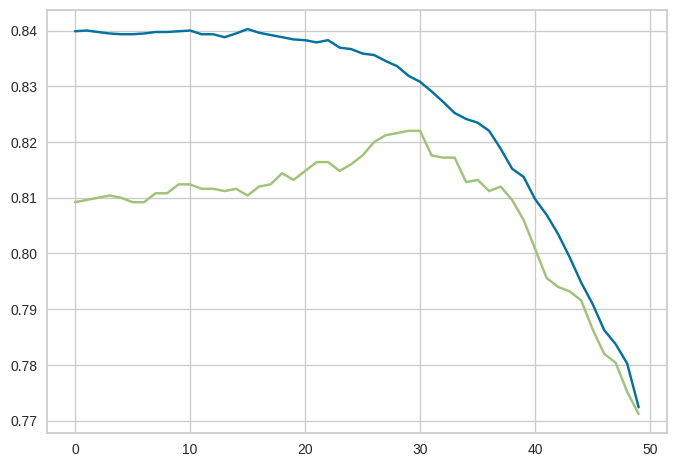

In [ ]:
# график зависимости эффективности модели от значения параметра регуляризации.
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {rc.score(X_train, y_train):.4f}")
print(f"Test score: {rc.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


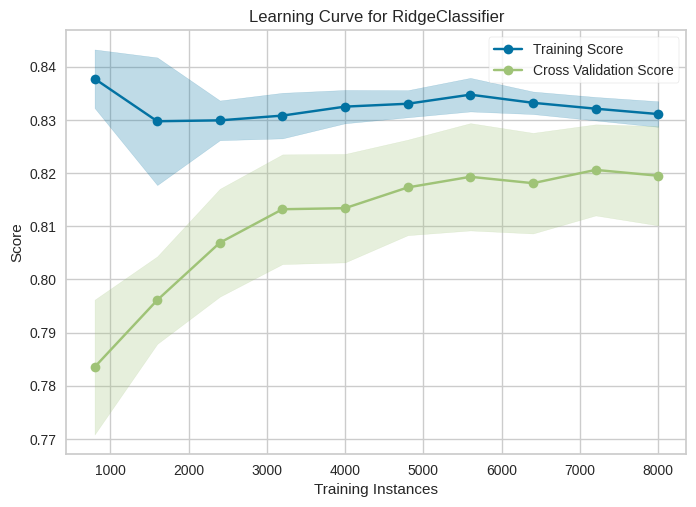

In [ ]:
# Давайте построим кривые обучения, чтобы посмотреть, как они выглядят для "хорошей" модели:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [ ]:
#Для более реалистичного примера загрузим датасет цен на недвижимость:

from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
X.shape, y.shape

((506, 104), (506,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")
# предположение о переобучении

Training score: 0.9521
Test score: 0.6075


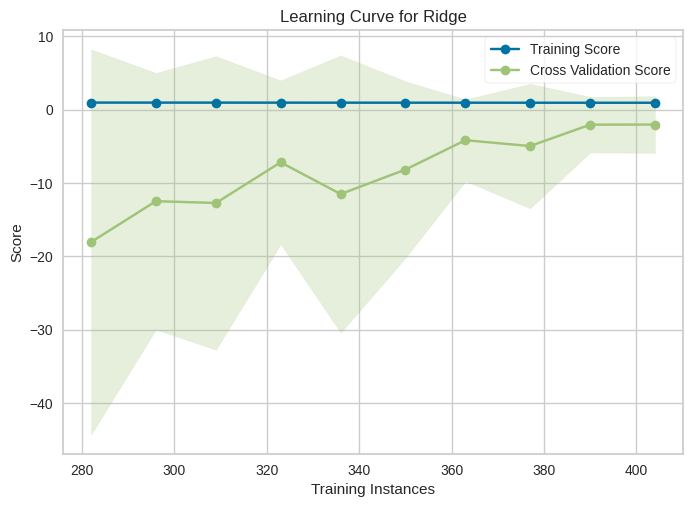

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()
# можно обоснованно предположить, что такая модель переобучается на имеющихся данных

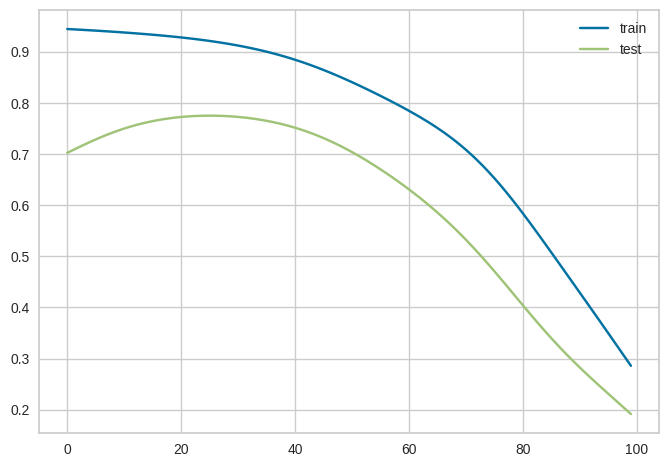

In [ ]:
# Сразу построим график зависимости эффективности модели от значения параметра L2-регуляризации:
from sklearn.linear_model import Ridge
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


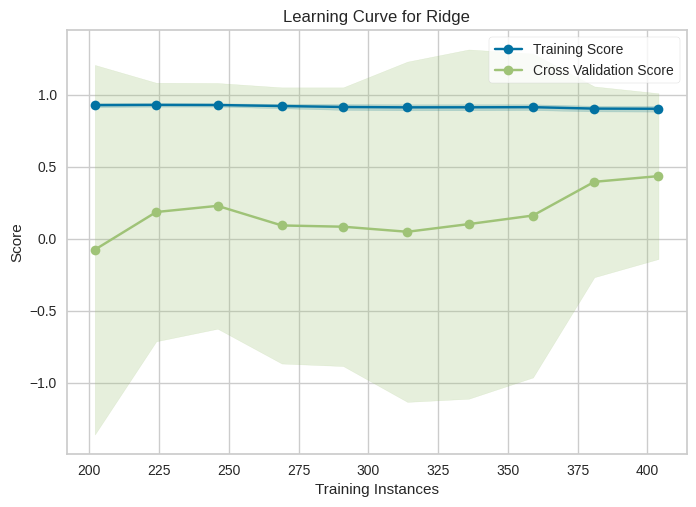

In [ ]:
# кривая обучения данной модели:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+02, tolerance: 3.233e

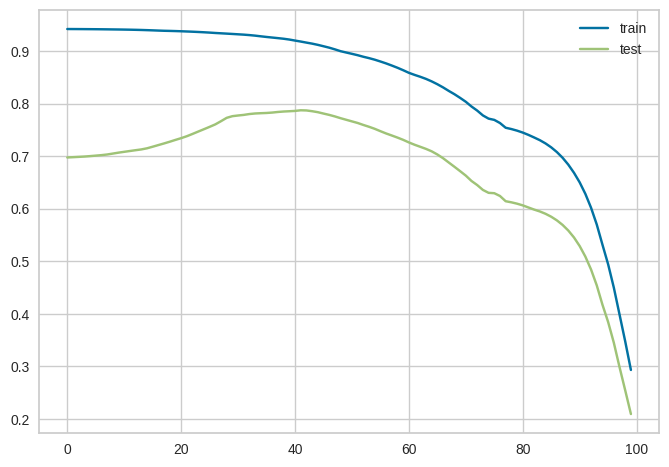

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# 2. Диагностика на реальных данных

In [ ]:
#  Будем использовать известный датасет для классификации "Диабет"
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Обратите внимание, что мы считали только первые 200 строк из файла. Этим мы 
# имитируем обучение на части данных. Формируем обучающую и тестовую выборки:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


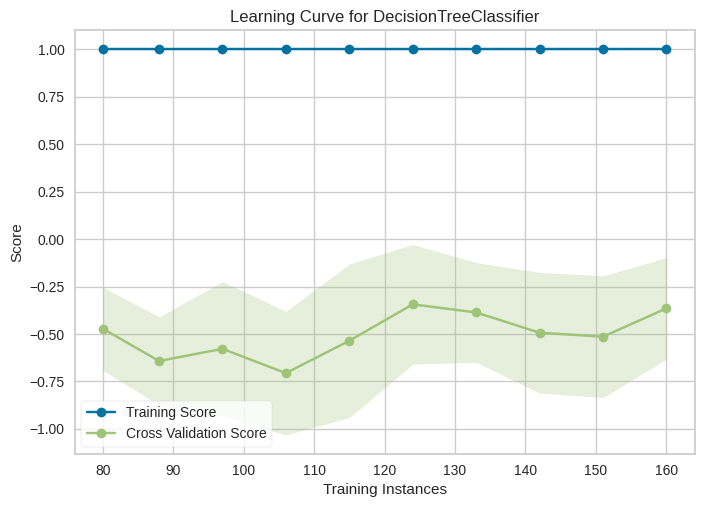

In [ ]:
# кривая обучения данной модели:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

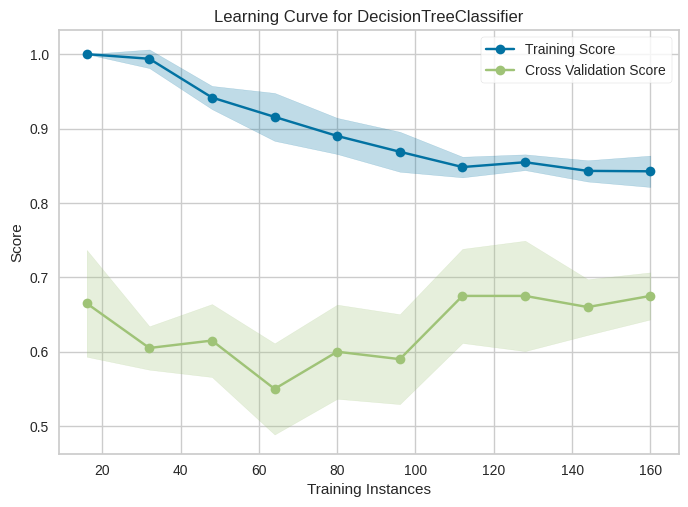

In [ ]:
# Аналогом регуляризации для деревьев будет искусственное ограничение максимальной глубины дерева.
# кривая обучения для такого регуляризованного дерева:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
from sklearn.metrics import f1_score
print(f"Train f1_score: {f1_score(y_train, y_train_pred):.2f}")
print(f"Test f1_score: {f1_score(y_test, y_pred):.2f}")

Train f1_score: 1.00
Test f1_score: 0.65


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


# Диагностика недообучения

In [ ]:
# Возьмем датасет из онлайн репозитория OpenML, посвященный проблеме управления истребителем F16:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Создадим и оценим простую модель логистической регрессии:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


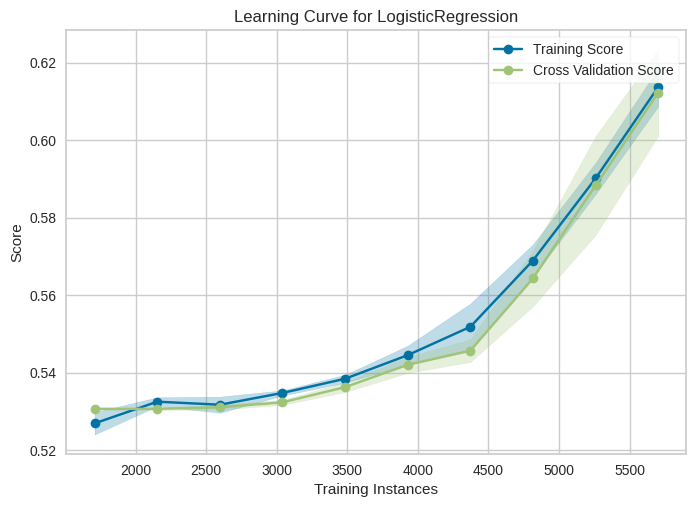

In [ ]:
# Построим кривую обучения данной модели:

visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show() 

In [ ]:
# многослойный перцептрон:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9379
Test score = 0.9369


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

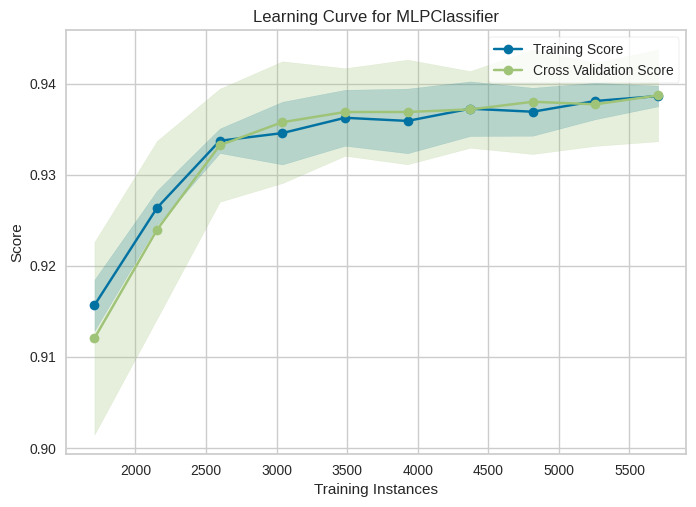

In [ ]:
# Самого главного мы добились - эффективность модели сильно выросла. 
# Но давайте построим график обучения:

visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [ ]:
# Кроме использования более вариативных моделей самих по себе 
# можно ввести в модель полиномиальные признаки:

from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


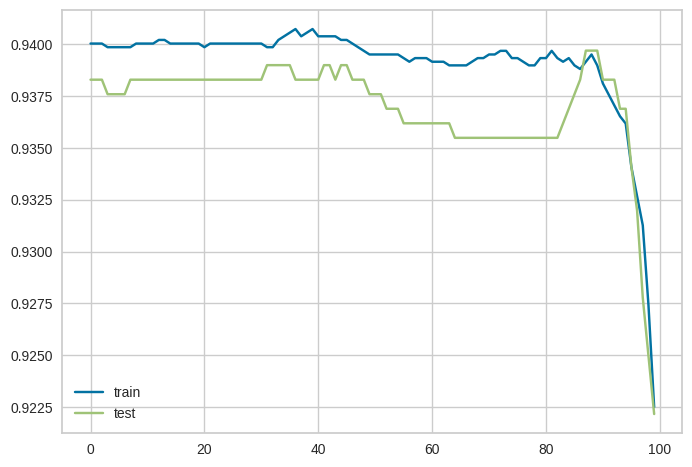

In [ ]:
#Для этой полиномиальной модели уже можно пробовать использовать регуляризацию 
# и строить соответствующие кривые:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

## Задания

Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lr = LogisticRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('precision :', precision_score(y_train, y_pred_train))
print('recall :', recall_score(y_train, y_pred_train))
print('f1 :', f1_score(y_train, y_pred_train))

precision : 0.8339009693476552
recall : 0.8515248796147673
f1 : 0.842620780939775


In [ ]:
print("Train precision score = %.4f" % precision_score(y_train, y_pred_train))
print("Test precision score = %.4f" % precision_score(y_test, y_pred_test))

Train precision score = 0.8339
Test precision score = 0.8069


In [ ]:
print("Train recall score = %.4f" % recall_score(y_train, y_pred_train))
print("Test recall score = %.4f" % recall_score(y_test, y_pred_test))

Train recall score = 0.8515
Test recall score = 0.8056


In [ ]:
print("Train f1 score = %.4f" % f1_score(y_train, y_pred_train))
print("Test f1 score = %.4f" % f1_score(y_test, y_pred_test))

Train f1 score = 0.8426
Test f1 score = 0.8062


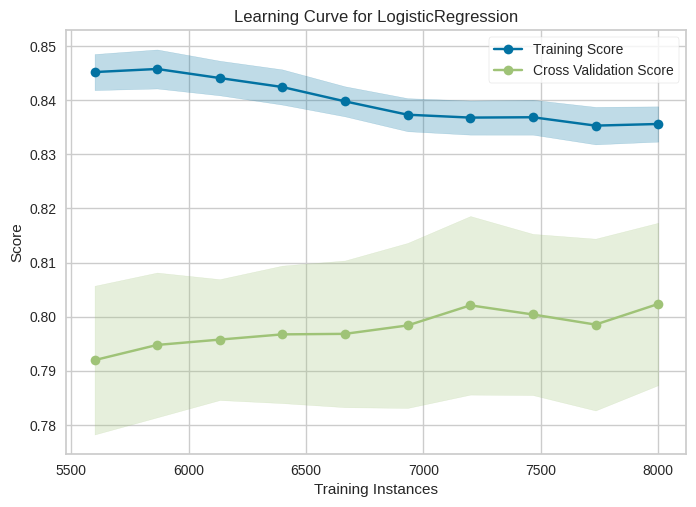

In [ ]:
# precision
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    lr, scoring='precision', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

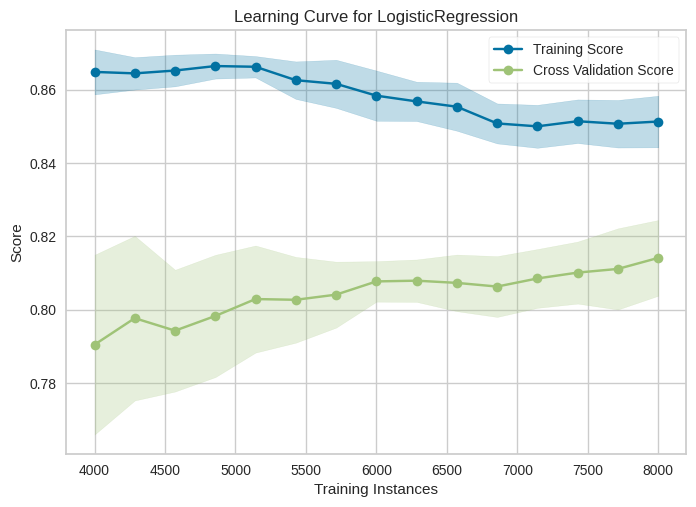

In [ ]:
# recall
#from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    lr, scoring='recall', train_sizes=np.linspace(0.5, 1.0, 15)
).fit(X, y).show()
print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

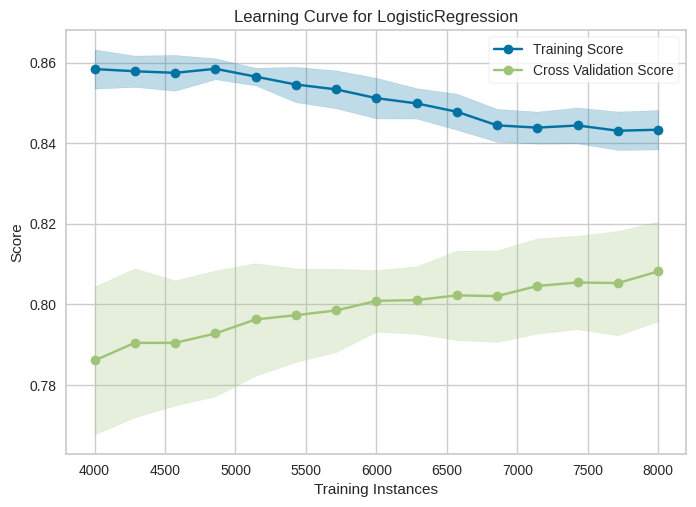

In [ ]:
# f1
#from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    lr, scoring='f1', train_sizes=np.linspace(0.5, 1.0, 15)
).fit(X, y).show()

### 2. Повторите диагностику модели регрессии с использованием других видов моделей:
* метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
* метода ближайших соседей (исследуйте влияние количества соседей)
* метода решающих деревьев (гиперпараметры по вашему выбору)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=10000, n_features=500, 
                           n_informative=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

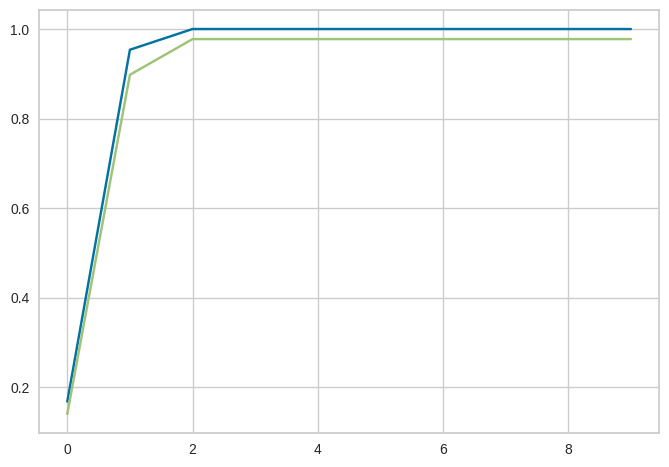

In [ ]:
#1
# график зависимости эффективности модели (метода опорных векторов ) от значения параметра C.
from sklearn import svm
trains = []
tests = []
for i in np.logspace(1, 10, 10):
  regr = svm.SVR(C = i).fit(X_train, y_train)
  trains.append(regr.score(X_train, y_train))
  tests.append(regr.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
r = np.logspace(1, 10, 10)[2]
regr = svm.SVR(C = r).fit(X_train, y_train)
print("Train score = %.4f" % regr.score(X_train, y_train))
print("Test score = %.4f" % regr.score(X_test, y_test))

Train score = 1.0000
Test score = 0.9775


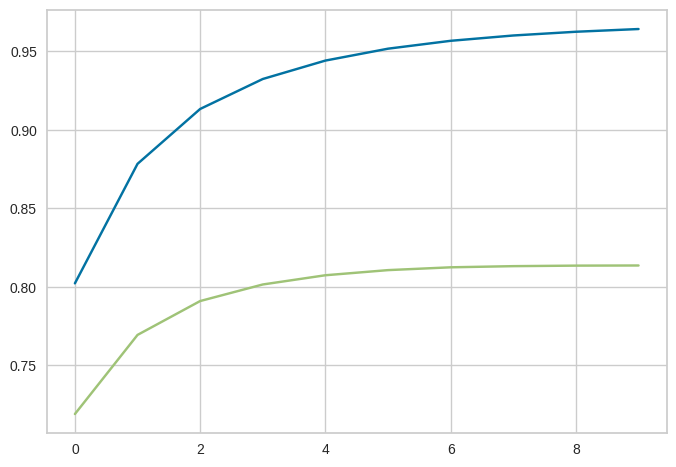

In [ ]:
# # Рассмотрим С на промежутке [0.1, 1]
# trains = []
# tests = []
# for i in np.arange(0.1, 1.1, 0.1):
#   regr = svm.SVR(C = i).fit(X_train, y_train)
#   trains.append(regr.score(X_train, y_train))
#   tests.append(regr.score(X_test, y_test))

# plt.plot(trains)
# plt.plot(tests)

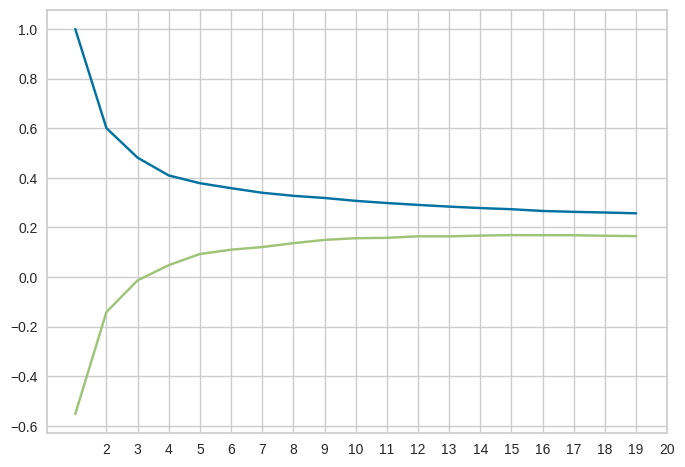

In [ ]:
#2
# weights = "uniform"
from sklearn.neighbors import KNeighborsRegressor
trains = []
tests = []
for i in np.arange(1, 20):
  knn = KNeighborsRegressor(n_neighbors = i, weights = "uniform").fit(X_train, y_train)
  trains.append(knn.score(X_train, y_train))
  tests.append(knn.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
plt.xticks(ticks = np.arange(1,20), labels = np.arange(2,21))
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = "uniform").fit(X_train, y_train)
print("Train score = %.4f" % knn.score(X_train, y_train))
print("Test score = %.4f" % knn.score(X_test, y_test))

Train score = 0.8818
Test score = 0.8132


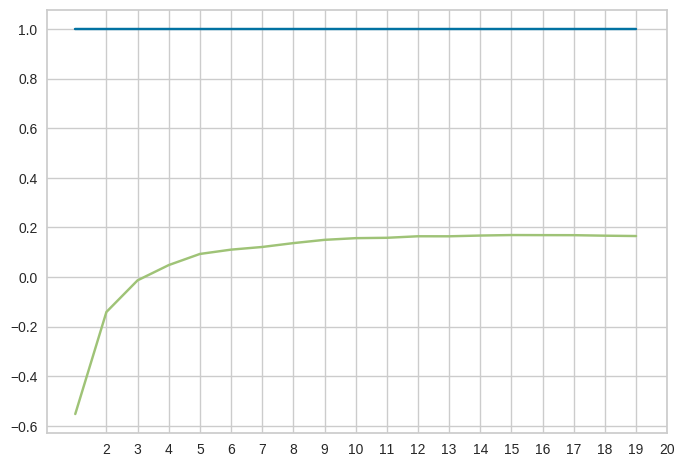

In [ ]:
# weights = ""distance"
trains = []
tests = []
for i in np.arange(1,20):
  knn = KNeighborsRegressor(n_neighbors = i, weights = "distance").fit(X_train, y_train)
  trains.append(knn.score(X_train, y_train))
  tests.append(knn.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
plt.xticks(ticks = np.arange(1,20), labels = np.arange(2,21))
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = "distance").fit(X_train, y_train)
print("Train score = %.4f" % knn.score(X_train, y_train))
print("Test score = %.4f" % knn.score(X_test, y_test))

Train score = 1.0000
Test score = 0.8143


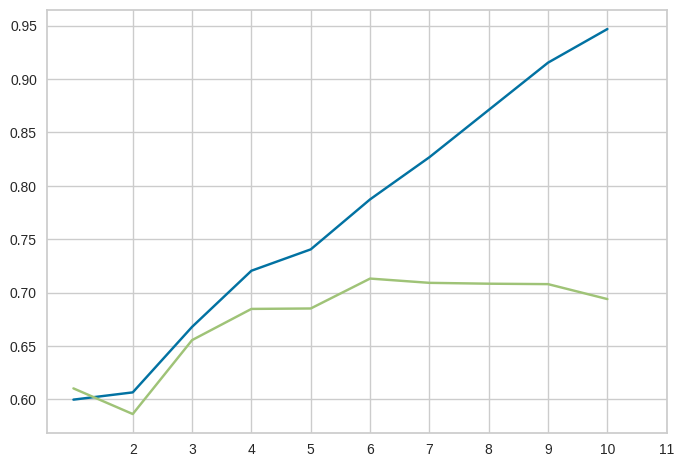

In [ ]:
#3
# max_depth
from sklearn.tree import DecisionTreeClassifier
trains = []
tests = []
for i in np.arange(1, 11):
  clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
  trains.append(clf.score(X_train, y_train))
  tests.append(clf.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
plt.xticks(ticks = np.arange(1,11), labels = np.arange(2,12))
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
print("Train score = %.4f" % clf.score(X_train, y_train))
print("Test score = %.4f" % clf.score(X_test, y_test))
clf.score(X_train, y_train) - clf.score(X_test, y_test)

Train score = 0.7205
Test score = 0.6848


0.035733333333333395

In [ ]:
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
print("Train score = %.4f" % clf.score(X_train, y_train))
print("Test score = %.4f" % clf.score(X_test, y_test))
clf.score(X_train, y_train) - clf.score(X_test, y_test)

Train score = 0.7405
Test score = 0.6852


0.055333333333333345

In [ ]:
clf = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
print("Train score = %.4f" % clf.score(X_train, y_train))
print("Test score = %.4f" % clf.score(X_test, y_test))
clf.score(X_train, y_train) - clf.score(X_test, y_test)

Train score = 0.7873
Test score = 0.7136


0.07373333333333332

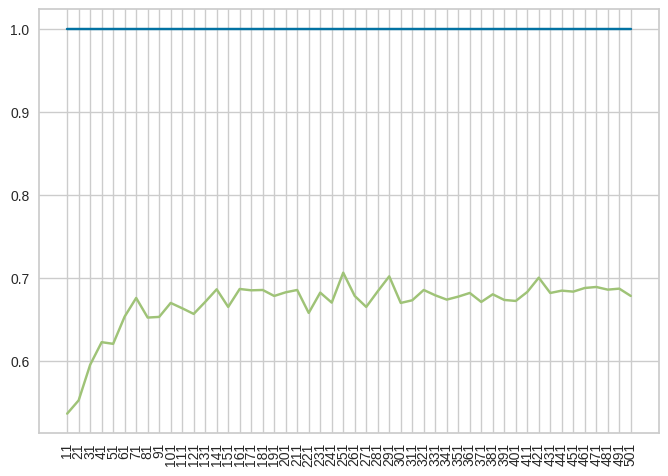

In [ ]:
# max_features
X.shape  (10000, 500)
from sklearn.tree import DecisionTreeClassifier
trains = []
tests = []
for i in np.arange(1, 500, 10):
  clf = DecisionTreeClassifier(max_features = i).fit(X_train, y_train)
  trains.append(clf.score(X_train, y_train))
  tests.append(clf.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
plt.xticks(ticks = np.arange(50), labels = np.arange(1+10, 500+10, 10), rotation=90)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_features = 251).fit(X_train, y_train)
print("Train score = %.4f" % clf.score(X_train, y_train))
print("Test score = %.4f" % clf.score(X_test, y_test))
clf.score(X_train, y_train) - clf.score(X_test, y_test)

Train score = 1.0000
Test score = 0.6720


0.32799999999999996

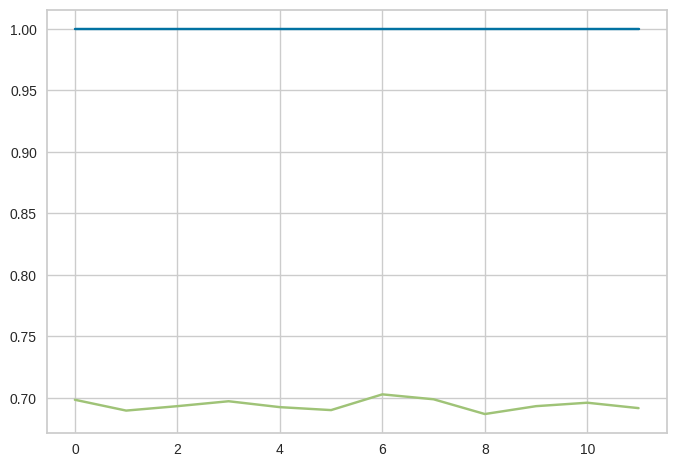

In [ ]:
# random_state
from sklearn.tree import DecisionTreeClassifier
trains = []
tests = []
for i in np.arange(1, 200, 18):
  clf = DecisionTreeClassifier(random_state = i).fit(X_train, y_train)
  trains.append(clf.score(X_train, y_train))
  tests.append(clf.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)
#plt.xticks(ticks = len(np.arange(1, 200, 18)), labels = np.arange(1+1, 200+1, 18))
plt.show()

In [ ]:
print(np.arange(1, 200, 18)[6])
clf = DecisionTreeClassifier(random_state = np.arange(1, 200, 18)[6]).fit(X_train, y_train)
print("Train score = %.4f" % clf.score(X_train, y_train))
print("Test score = %.4f" % clf.score(X_test, y_test))
clf.score(X_train, y_train) - clf.score(X_test, y_test)

109
Train score = 1.0000
Test score = 0.7028


0.2972

###  3. Дополните анализ датасета Бостон исследованием модели лассо -
 постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [ ]:
# Возьмем датасет из онлайн репозитория OpenML, Бостон:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='boston', parser="auto")
data.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


(506, 13)

In [ ]:
data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
y.value_counts() # -> регрессия

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [ ]:
# Создадим и оценим модель лассо :
from sklearn.linear_model import Lasso
ls = Lasso().fit(X_train, y_train)
print("Train score = %.4f" % ls.score(X_train, y_train))
print("Test score = %.4f" % ls.score(X_test, y_test))

Train score = 0.7112
Test score = 0.4628


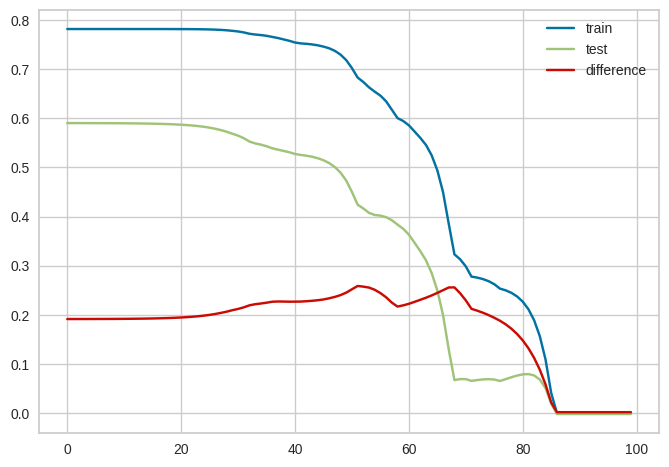

In [ ]:
trains = []
tests = []
dif = []
for i in np.logspace(-4, 4, 100):
  ls = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ls.score(X_train, y_train))
  tests.append(ls.score(X_test, y_test))
  dif.append(ls.score(X_train, y_train) - ls.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.plot(dif, label="difference")
plt.legend()

In [ ]:
print('оптимальное значение параметра регуляризации в модели лассо')
las_a = np.logspace(-4, 4, 100)[19]
round(las_a, 5)

оптимальное значение параметра регуляризации в модели лассо


0.00343

In [ ]:
np.logspace(-4, 4, 100)[85]

739.072203352579

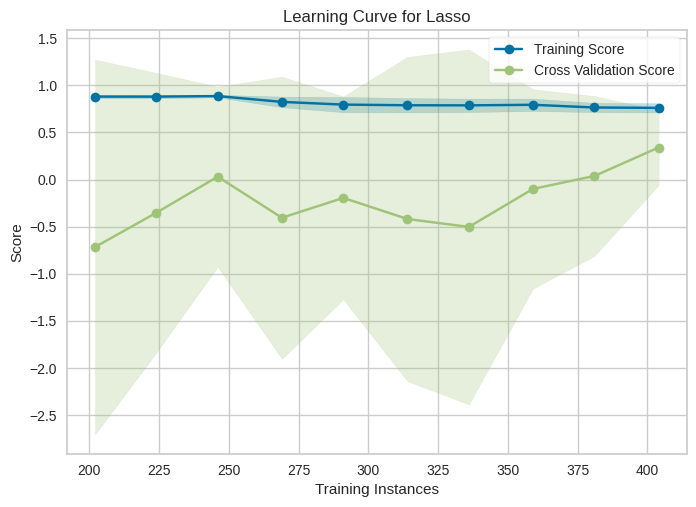

In [ ]:
visualizer = LearningCurve(
    Lasso(alpha=las_a), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

In [ ]:
# можем сделать вывод, что модель недообучена

In [ ]:
# Попробуем другие модели

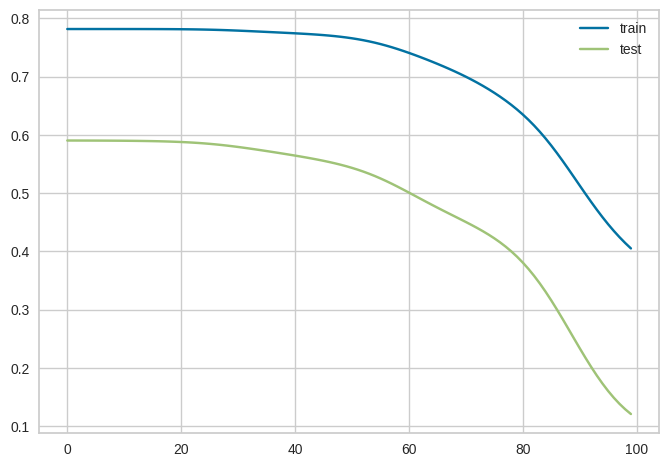

In [ ]:
# Ridge
trains = []
tests = []
for i in np.logspace(-2, 5, 100):
  ridge = Ridge(alpha = i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

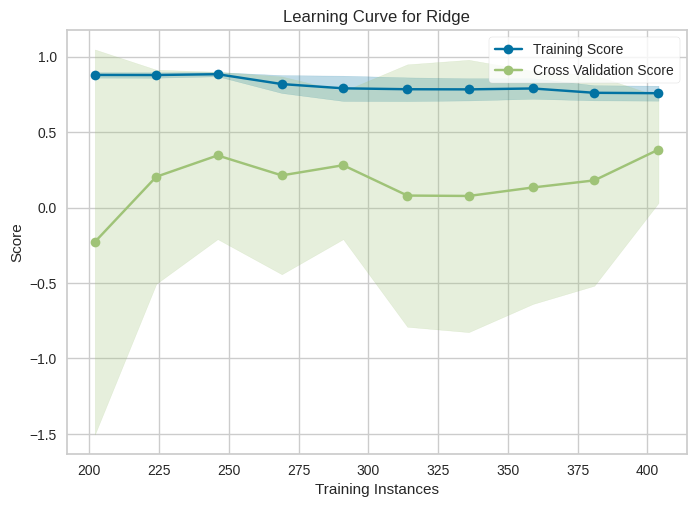

In [ ]:
visualizer = LearningCurve(
    Ridge(), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

# visualizer = LearningCurve(
#     Ridge(alpha = np.logspace(-2, 5, 100)[10]), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
# ).fit(X, y) .show() 

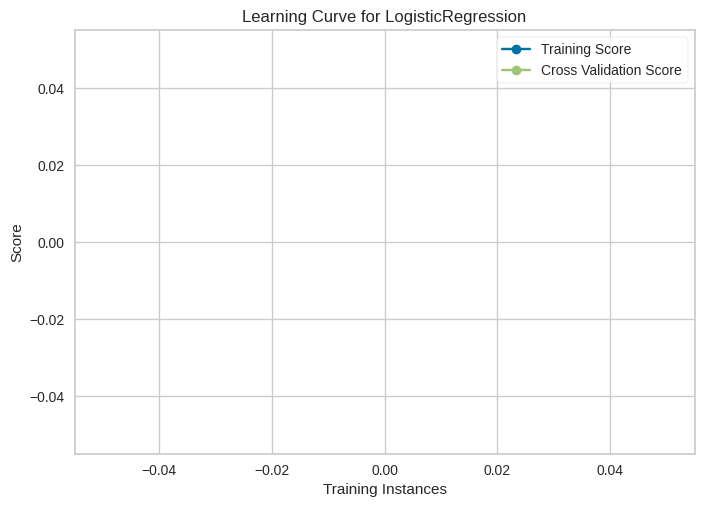

In [ ]:
# LogisticRegression()
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor().fit(X_train, y_train)
print("Train score = %.4f" % model.score(X_train, y_train))
print("Test score = %.4f" % model.score(X_test, y_test))

Train score = 0.5594
Test score = 0.2769


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

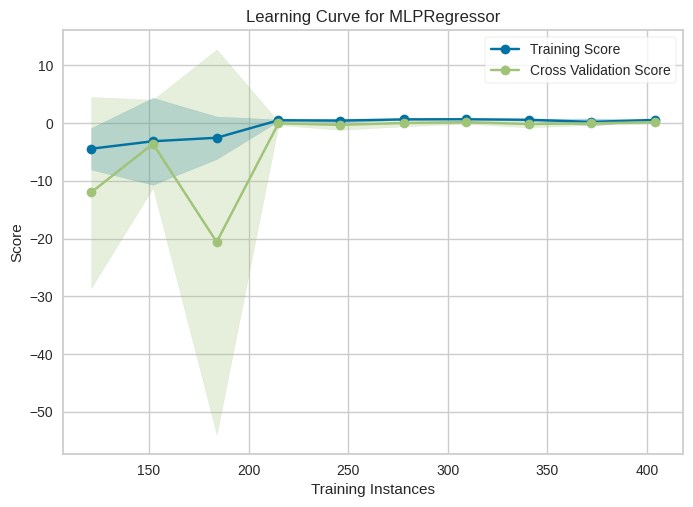

In [ ]:
visualizer = LearningCurve(
    MLPRegressor(), scoring='r2', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

### 4. В одном из двух первых примеров используйте модель ElasticNet 
и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=10000, n_features=500, 
                           n_informative=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print("Train score = %.4f" % regr.score(X_train, y_train))
print("Test score = %.4f" % regr.score(X_test, y_test))
regr.score(X_train, y_train) - regr.score(X_test, y_test)

Train score = 0.8882
Test score = 0.8792


0.009012207067615075

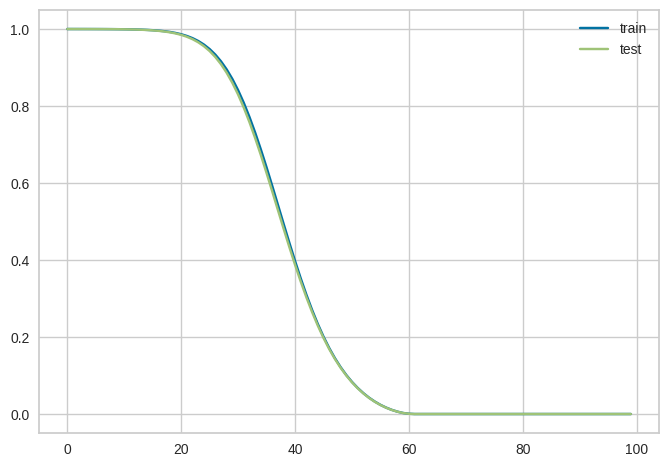

In [ ]:
trains = []
tests = []
for i in np.logspace(-2, 5, 100):
  en = ElasticNet(alpha = i).fit(X_train, y_train)
  trains.append(en.score(X_train, y_train))
  tests.append(en.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
en = ElasticNet(alpha = np.logspace(-2, 5, 100)[10]).fit(X_train, y_train)
print("Train score = %.4f" % en.score(X_train, y_train))
print("Test score = %.4f" % en.score(X_test, y_test))
print('alpha = ', np.logspace(-2, 5, 100)[10])

Train score = 0.9994
Test score = 0.9993
alpha =  0.0509413801481638


In [ ]:
b_a = np.logspace(-2, 5, 100)[0]
en = ElasticNet(alpha = b_a).fit(X_train, y_train)
print("Train score = %.4f" % en.score(X_train, y_train))
print("Test score = %.4f" % en.score(X_test, y_test))
print('alpha = ', b_a)

Train score = 1.0000
Test score = 1.0000
alpha =  0.01


class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+08, tolerance: 1.506e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


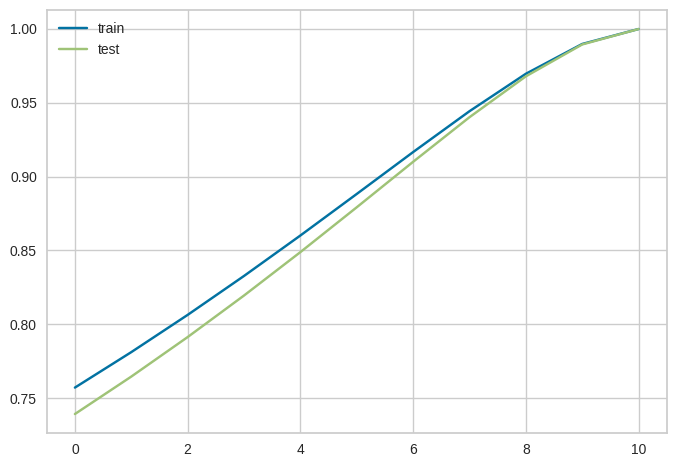

In [ ]:
trains = []
tests = []
for i in np.arange(0,1.1,0.1):
  en = ElasticNet(l1_ratio = i).fit(X_train, y_train)
  trains.append(en.score(X_train, y_train))
  tests.append(en.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
b_l1 = 1
en = ElasticNet(l1_ratio = b_l1).fit(X_train, y_train)
print("Train score = %.4f" % en.score(X_train, y_train))
print("Test score = %.4f" % en.score(X_test, y_test))
print('alpha = ', b_l1)

Train score = 0.9998
Test score = 0.9997
alpha =  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.352e+06, tolerance: 1.506e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


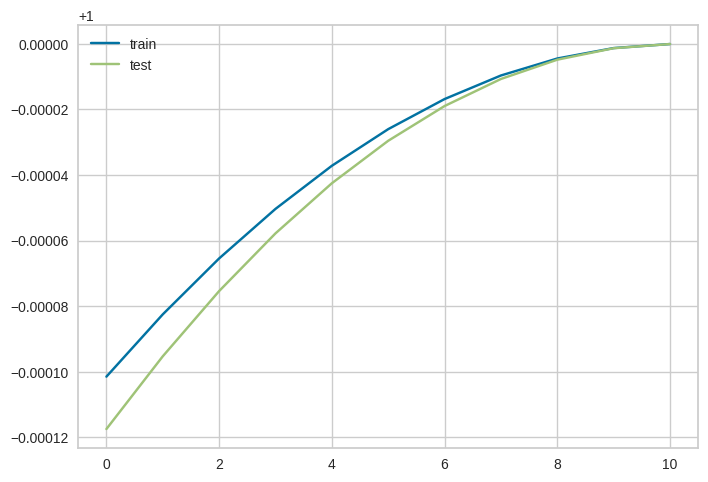

In [ ]:
trains = []
tests = []
for i in np.arange(0,1.1,0.1):
  en = ElasticNet(alpha = b_a, l1_ratio = i).fit(X_train, y_train)
  trains.append(en.score(X_train, y_train))
  tests.append(en.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

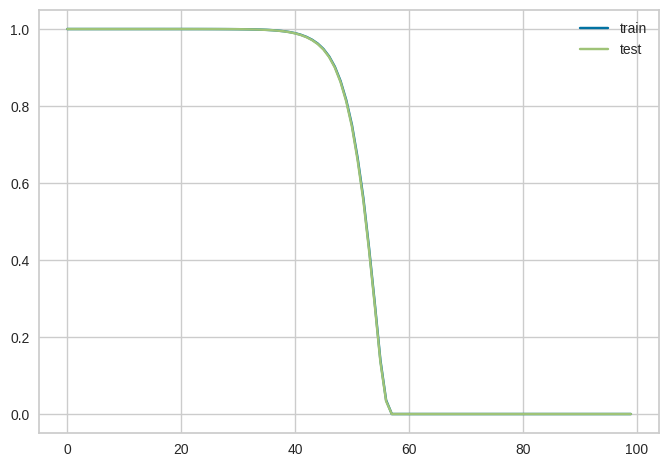

In [ ]:
trains = []
tests = []
for i in np.logspace(-2, 5, 100):
  en = ElasticNet(alpha = i, l1_ratio = b_l1).fit(X_train, y_train)
  trains.append(en.score(X_train, y_train))
  tests.append(en.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
np.logspace(-2, 5, 100)[40]

6.7341506577508214

### 5. Дополните анализ дерева решений из третьего примера: 
постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='boston', parser="auto")
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


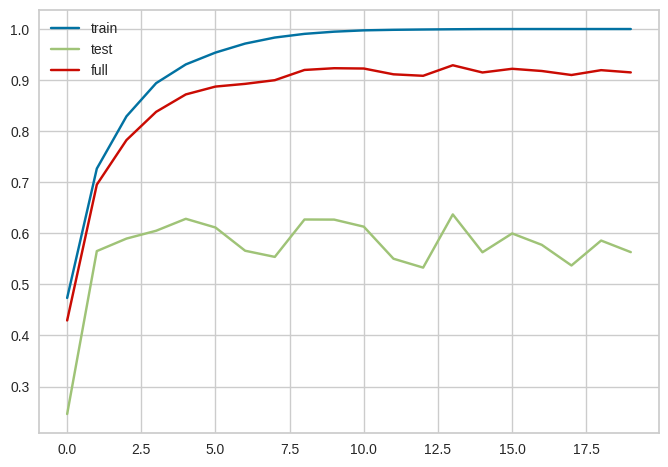

In [ ]:
# max_depth
# r2
from sklearn.tree import DecisionTreeRegressor
trains = []
tests = []
line = []
for i in np.arange(1, 21):
  clf = DecisionTreeRegressor(max_depth = i).fit(X_train, y_train)
  trains.append(clf.score(X_train, y_train))
  tests.append(clf.score(X_test, y_test))
  line.append(clf.score(X, y))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.plot(line, label="full")
#plt.xticks(ticks = np.arange(20), labels = np.arange(2,22))
plt.legend()
plt.show()

In [ ]:
# Видим, что модель переобучена, найдём оптимальную глубину дерева
b_depth = np.arange(1, 21)[13]
# clf = DecisionTreeRegressor(max_depth = b_depth).fit(X_train, y_train)
# print("Train score = %.4f" % clf.score(X_train, y_train))
# print("Test score = %.4f" % clf.score(X_test, y_test))
print('max_depth = ', b_depth)

max_depth =  14


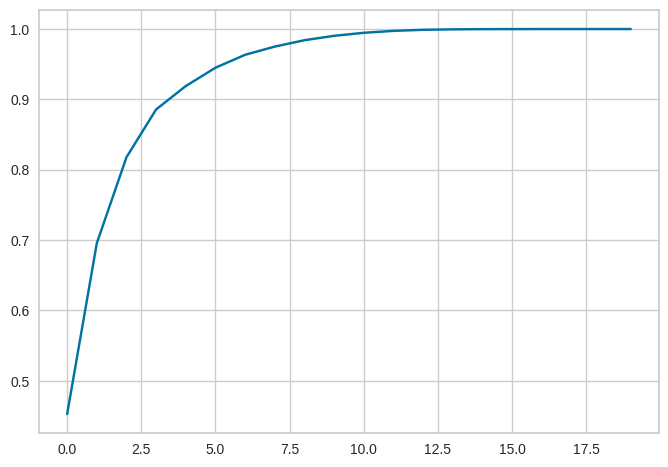

In [ ]:
line = []
for i in np.arange(1, 21):
  clf = DecisionTreeRegressor(max_depth = i).fit(X, y)
  line.append(clf.score(X, y))

plt.plot(line)
#plt.xticks(ticks = np.arange(20), labels = np.arange(2,22))
plt.show()

In [ ]:
clf = DecisionTreeRegressor(max_depth = 15).fit(X, y)
clf.score(X, y)
#f1_score(y_train, clf.predict(X_train))

0.9998908925359424

In [ ]:
# max_depth
# F1  # только для классиыикации
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
trains = []
tests = []
line = []
for i in np.arange(1, 21):
  clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
  trains.append(f1_score(y_train, clf.predict(X_train)))
  tests.append(f1_score(y_test, clf.predict(X_test)))
  line.append(f1_score(y, clf.predict(X)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.plot(line, label="full")
#plt.xticks(ticks = np.arange(20), labels = np.arange(2,22))
plt.legend()
plt.show()
# ????????????????????????????????????

ValueError: ignored

### 6. Повторите анализ на других реальных датасетах из репозитория OpenML:
* phoneme
* banknote-authentication
* delta_ailerons
* mammography
* electricity
* mozilla4
* kropt
* nursery
* volcanoes-b3

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='phoneme', parser="auto")
X = pd.get_dummies(data.data)
y = data.target
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1.
  warn(


In [ ]:
y.value_counts() # - > классификация

1    3818
2    1586
Name: Class, dtype: int64

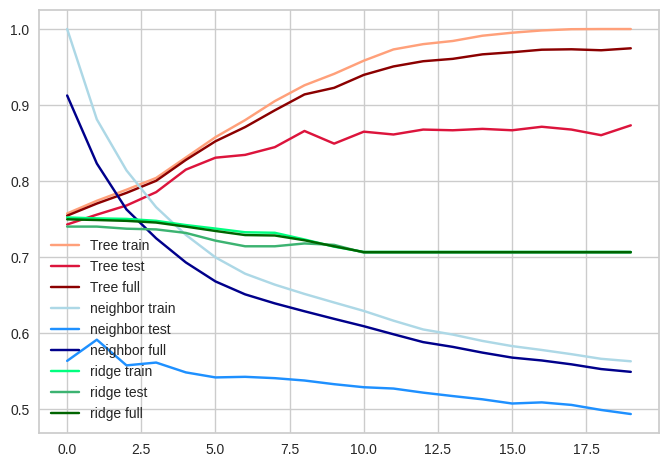

LogisticRegression :
Training score: 0.7543
Test score: 0.7401
score: 0.7515


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeClassifier
t_trains = []
t_tests = []
t_line = []
n_trains = []
n_tests = []
n_line = []
r_trains = []
r_tests = []
r_line = []
for i in np.arange(1, 21):
  clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
  t_trains.append(clf.score(X_train, y_train))
  t_tests.append(clf.score(X_test, y_test))
  t_line.append(clf.score(X, y))

  knn = KNeighborsRegressor(n_neighbors = i, weights = "uniform").fit(X_train, y_train)
  n_trains.append(knn.score(X_train, y_train))
  n_tests.append(knn.score(X_test, y_test))  
  n_line.append(knn.score(X, y))

  # lr = LogisticRegression().fit(X_train, y_train)
  # l_trains.append(lr.score(X_train, y_train))
  # l_tests.append(lr.score(X_test, y_test))  
  # l_line.append(lr.score(X, y))

for i in np.logspace(2, 6, 20):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  r_trains.append(ridge.score(X_train, y_train))
  r_tests.append(ridge.score(X_test, y_test))
  r_line.append(ridge.score(X, y))

plt.plot(t_trains, label="Tree train", c = '#FFA07A')
plt.plot(t_tests, label="Tree test", c = '#DC143C')
plt.plot(t_line, label="Tree full", c = '#8B0000')

plt.plot(n_trains, label="neighbor train", c = '#ADD8E6')
plt.plot(n_tests, label="neighbor test", c = '#1E90FF')
plt.plot(n_line, label="neighbor full", c = '#00008B')

plt.plot(r_trains, label="ridge train", c = '#00FF7F')
plt.plot(r_tests, label="ridge test", c = '#3CB371')
plt.plot(r_line, label="ridge full", c = '#006400')

plt.legend()
plt.show()

print('LogisticRegression :')
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")
print(f"score: {lr.score(X, y):.4f}")


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

def analysis(d_name):
  data = fetch_openml(name=d_name, parser="auto")
  le = LabelEncoder()
  X = pd.get_dummies(data.data)
  y = data.target
  print(X.shape)
  print(y.value_counts())
  le.fit(y)
  y = le.transform(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  t_trains = []
  t_tests = []
  t_line = []
  n_trains = []
  n_tests = []
  n_line = []
  r_trains = []
  r_tests = []
  r_line = []
  for i in np.arange(1, 21):
    clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    t_trains.append(clf.score(X_train, y_train))
    t_tests.append(clf.score(X_test, y_test))
    t_line.append(clf.score(X, y))

    knn = KNeighborsRegressor(n_neighbors = i, weights = "uniform").fit(X_train, y_train)
    n_trains.append(knn.score(X_train, y_train))
    n_tests.append(knn.score(X_test, y_test))  
    n_line.append(knn.score(X, y))

    # lr = LogisticRegression().fit(X_train, y_train)
    # l_trains.append(lr.score(X_train, y_train))
    # l_tests.append(lr.score(X_test, y_test))  
    # l_line.append(lr.score(X, y))

  for i in np.logspace(2, 6, 20):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    r_trains.append(ridge.score(X_train, y_train))
    r_tests.append(ridge.score(X_test, y_test))
    r_line.append(ridge.score(X, y))

  plt.plot(t_trains, label="Tree train", c = '#FFA07A')
  plt.plot(t_tests, label="Tree test", c = '#DC143C')
  plt.plot(t_line, label="Tree full", c = '#8B0000')

  plt.plot(n_trains, label="neighbor train", c = '#ADD8E6')
  plt.plot(n_tests, label="neighbor test", c = '#1E90FF')
  plt.plot(n_line, label="neighbor full", c = '#00008B')

  plt.plot(r_trains, label="ridge train", c = '#00FF7F')
  plt.plot(r_tests, label="ridge test", c = '#3CB371')
  plt.plot(r_line, label="ridge full", c = '#006400')

  plt.legend()
  plt.show()

  print('LogisticRegression :')
  lr = LogisticRegression().fit(X_train, y_train)

  print(f"Training score: {lr.score(X_train, y_train):.4f}")
  print(f"Test score: {lr.score(X_test, y_test):.4f}")
  print(f"score: {lr.score(X, y):.4f}")


(1372, 4)
1    762
2    610
Name: Class, dtype: int64


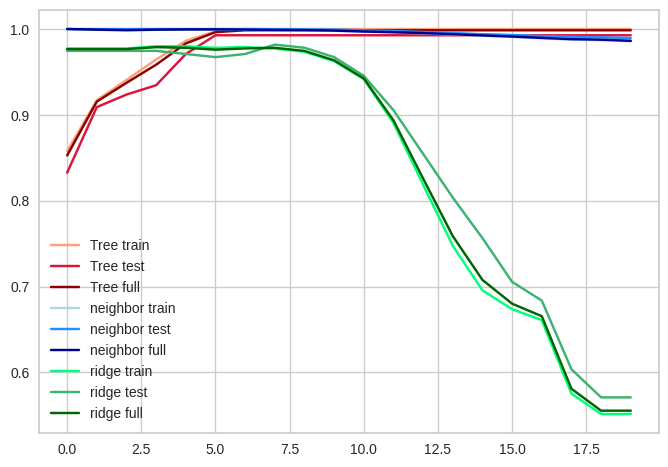

LogisticRegression :
Training score: 0.9900
Test score: 0.9927
score: 0.9905


In [ ]:
analysis('banknote-authentication')

(7129, 5)
P    3783
N    3346
Name: binaryClass, dtype: int64


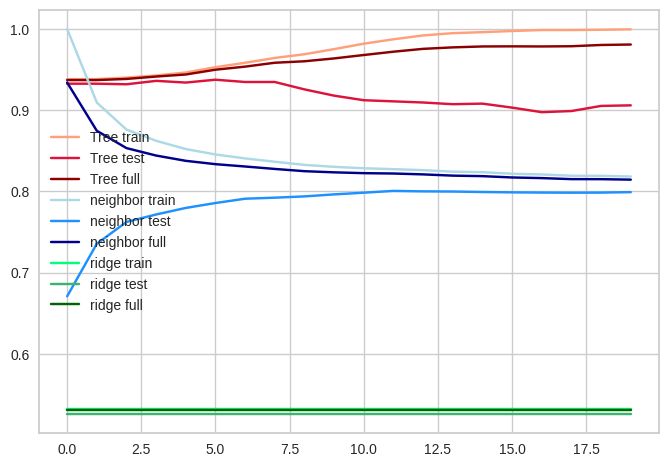

LogisticRegression :
Training score: 0.6058
Test score: 0.5940
score: 0.6035


In [ ]:
# analysis('delta_ailerons')
# ValueError: Cannot cast object dtype to int64
analysis('delta_ailerons')

(11183, 6)
-1    10923
1       260
Name: class, dtype: int64


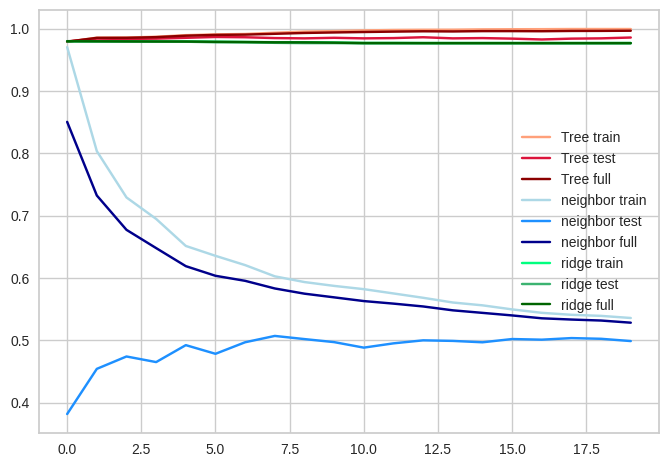

LogisticRegression :
Training score: 0.9839
Test score: 0.9826
score: 0.9836


In [ ]:
analysis('mammography')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1.
  warn(


(45312, 14)
DOWN    26075
UP      19237
Name: class, dtype: int64


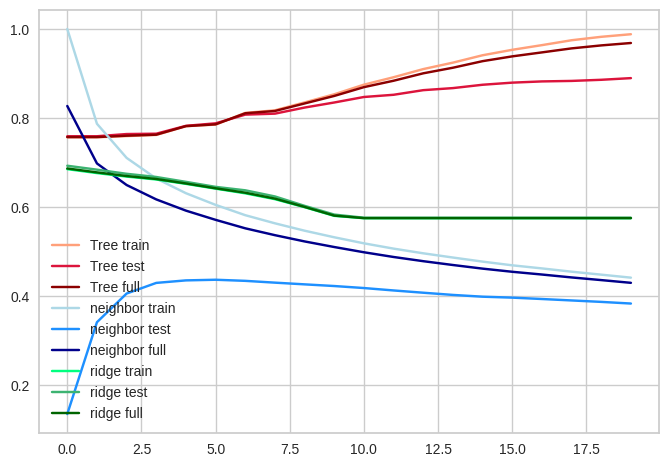

LogisticRegression :
Training score: 0.7524
Test score: 0.7587
score: 0.7536


In [ ]:
#analysis('electricity')
# ValueError: Cannot cast object dtype to int64
analysis('electricity')

(15545, 5)
1    10437
0     5108
Name: state, dtype: int64


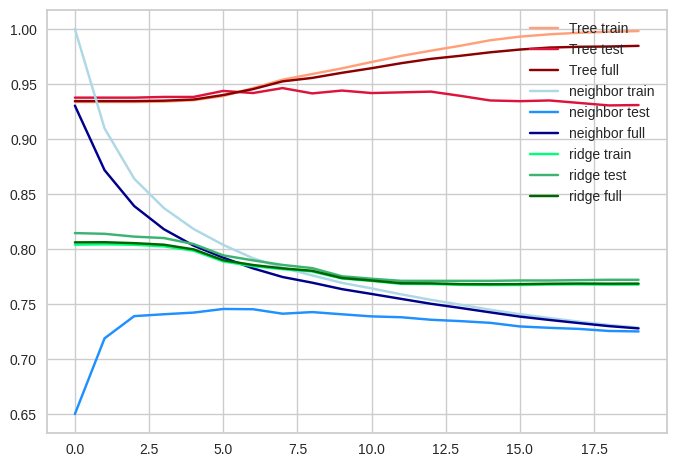

LogisticRegression :
Training score: 0.8491
Test score: 0.8578
score: 0.8509


In [ ]:
analysis('mozilla4')

(28056, 40)
fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: game, dtype: int64


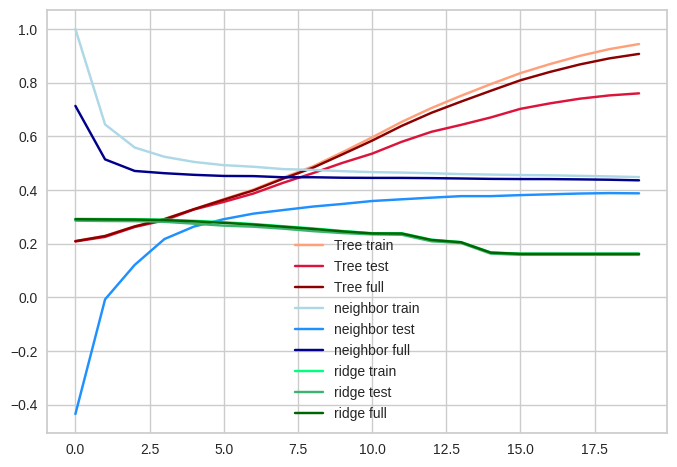

LogisticRegression :
Training score: 0.4112
Test score: 0.4020
score: 0.4094


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# analysis('kropt')
# ValueError: Cannot cast object dtype to int64
analysis('kropt')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name nursery exist. Versions may be fundamentally different, returning version 1.
  warn(


(12960, 27)
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64


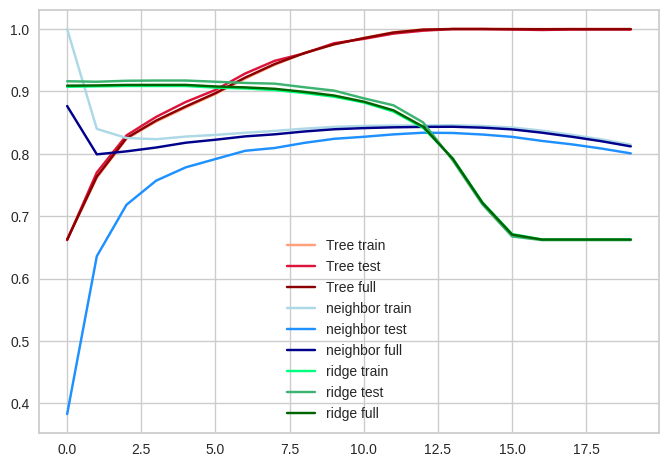

LogisticRegression :
Training score: 0.9253
Test score: 0.9329
score: 0.9269


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# analysis('nursery')
# ValueError: Cannot cast object dtype to int64
analysis('nursery')

(10386, 3)
1    10006
5      208
3       75
4       72
2       25
Name: Class, dtype: int64


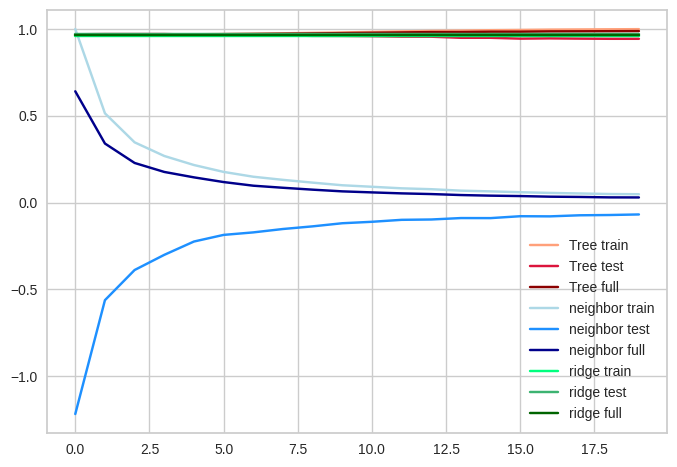

LogisticRegression :
Training score: 0.9620
Test score: 0.9702
score: 0.9636


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
analysis('volcanoes-b3')

In [ ]:
# 'delta_ailerons'
# 'electricity'
# 'kropt'
# 'nursery'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = fetch_openml(name='delta_ailerons', parser="auto")
X = pd.get_dummies(data.data)
y = data.target
print(X.shape)
print(y.value_counts())
le.fit(y)
y = le.transform(y)
pd.Series(y).value_counts()

(7129, 5)
P    3783
N    3346
Name: binaryClass, dtype: int64


1    3783
0    3346
dtype: int64

In [ ]:
y

0       P
1       N
2       P
3       P
4       N
       ..
7124    N
7125    P
7126    P
7127    N
7128    N
Name: binaryClass, Length: 7129, dtype: category
Categories (2, object): ['N', 'P']

# Контрольные вопросы

https://github.com/koroteevmv/ML_course/tree/2023_new/ML4.3%20diagnostics

1. Что такое обобщающая способность модели?
2. Что такое переобучение модели?
3. Какие есть способы борьбы с переобучением?
4. Что такое регуляризация модели, как она работает?
5. Чем отличаются разные методы регуляризации моделей?
6. Что такое недообучение модели?
7. Какие есть способы борьбы с недообучением?


1)
Обобщающая способность — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

2) Большой промежуток между тестовой и обучающей эффективностью свидетельствует о переобучении

3) 
* Введение регуляризации, искусственное упрощение моделей
* обучение на более полном датасете, то есть добавление большого количества данных

4) Регуляризация – это техника, которая уменьшает ошибки модели, избегая переоснащения и обучая модель правильному функционированию.

5) У каждого метода разные параметры регуляризации

6) Низкое значение обучающей эффективности, малый разрыв между обучающей и тестовой эффективностью

7) Использование более сложных, вариативных моделей (например, многослойный перцептрон)